##### ANSWERS: WMP Machine Learning Lab 1 - Exploratory Data Analysis

## Overview: 
Perhaps the single most important skill in Data Science is the ability to familiarize yourself with data. No model will ever be good enough to overcome bad data, nor will a model generate data understanding for you. Therefore, this lab is your chance to apply what you learned from the EDA lectures to a real dataset. 

## Agenda (Total time: 6 hours)
- Introduction, guided lab (**2.5 hours**)
- Team work on EDA report (**2 hours**)
- Presentation of EDA report (**1.5 hours, 45 mins per team**)

### Instructor: Sam Showalter

-------------------------

# Introduction

## Source Data:

https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/ 

SAMPLE DATA: HR Employee Attrition and Performance
avatar McKinley Stacker IV  Sep 14, 2015  91925
Watson Analytics Sample Data

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

### EDA Topics to Cover

- Summary statistics
- Histograms and Univariate plots
- Bivariate plots
- Correlation and correlation plots
- Outlier detection
- Categorical data analysis

### Stretch EDA Topics (for those who want to show off)
- QQ Plots
- Advanced Seaborn Plotting
- Iteractive EDA plotting (plotly)

### Goal and Guided Agenda

As a new data scientist in a R&D technology company, your executive analytics committee has tasked you to find the driving factors of attrition in the organization. You are planning on doing the following:

- **20 minutes** -  Before starting through this notebook, as a team take 15 minutes to develop some initial theories  on why some empoloyees Attrite and others do not. Think about some EDA techniques that could be useful. Write down your theories and share them once the exercise ends (5 minutes). 
- **20 minutes** - Now that you have given a _cold_ assessment of potential Attrition reasons, take 15 minutes to assess and consider the Summary Statistics section of this notebook. Gather evidence from this section and take 5 minutes to share those findings once you are done.
- **60 minutes** - With some summary statistic information in hand, augment your exploration by taking 55 minutes considering the Pandas Profiler, which provides an immense amount of information in HTML format. Go through this report and document any important findings. In particular, take note of the following and discuss what you found for 5 minutes at the end:
    + Consider the correlation information and correlation plots in **4.**
    + Assess the composition of categorical variables in **5.**
    + Document areas where you think the Pandas Profiler may have made mistakes, if any
    + See if you can identify any outliers from the profiler, or by doing custom analysis with Pandas
- **40 minutes** -- Finally, examine the univariate and bivariate plots section to determine if there are any trends that you missed or could not see with the previous resources. Add these findings to your notes, and make note of any situations where univariate and bivariate plots were not particularly insightful. 
- **BONUS** - If you were able to get through all of this and have extra time at the end, examine some of the stretch topics and try to create valuable EDA insights of your own, in Python. NOTE: Make sure you are completely done with and confident about your previous sections before proceeding to the bonus

Use the graphs that have been created for you below, and answer the questions provided. Good luck!

# 1. Install packages

This may be necesarry to run the first time

In [1]:
!pip install pandas
!pip install pandas_profiling
!pip install seaborn
!pip install matplotlib
!pip install numpy

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# 2. Import Data, Summary Statistics

In [2]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
#Read in data
raw_df = pd.read_csv("https://raw.githubusercontent.com/SamShowalter/WMP_training/01_EDA/data/Master_IBM_Employee_Attrition.csv")

#View data
print("Data Shape: {} rows x {} cols".format(len(raw_df), len(raw_df.columns)))
raw_df.head()

Data Shape: 1470 rows x 35 cols


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Pandas .describe() is used to get basic summary statistics

However, there are other commands you can run to get other summary information. Feel free to add those!

In [4]:
#Describe the dataframe
raw_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Generate Target Variable

In [5]:
raw_df['target'] = raw_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
raw_df = raw_df.drop('Attrition', axis = 1)

## Create numeric and categorical column lists

In [6]:
target_cols = ['target']
num_cols = list(set(raw_df._get_numeric_data().columns) - set(target_cols))
cat_cols = list(set(raw_df.columns) - set(num_cols) - set(target_cols))

In [7]:
# ADD OTHER EDA COMMANDS AND CODE HERE, IF NEEDED


# 3. Pandas profiling provides robust EDA with formatted HTML output

In [8]:
import pandas_profiling

#Create profiler
def profile_data(data):
    return pandas_profiling.ProfileReport(data)

In [9]:
# RUN FUNCTION TO ANALYZE DATA WITH PROFILER


In [10]:
# ADD CUSTOM EDA CODE HERE TO SUPPLEMENT THE PROFILER, IF NEEDED


# 4. Correlation Analysis

Use the function below to run correlation analysis, and feel free to choose univariate or bivariate information

In [11]:
def correlation_analysis(data, num_cols, univariate = False):
    
    #Generate correlation
    corr = data[num_cols].corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

In [12]:
# RUN CORRELATION FUNCTION


In [13]:
# ADD CUSTOM EDA CODE HERE TO SUPPLEMENT THE CORRELATION, IF NEEDED


# 5. Bar Line Plots and Categorical Data

In [14]:
def dual_axis_sort(data1, data2, ascending=False):
    ix = data1.sort_values(ascending=ascending).index
    data1 = data1.reindex(ix)
    data2 = data2.reindex(ix)
    return data1, data2

def bar_line_plot(data, col, title):
    region_cnt = data.groupby(col)['target'].count()
    region_avg = data.groupby(col)['target'].mean()
    region_avg = region_avg.loc[list(region_cnt.index)]     
    region_cnt, region_avg = dual_axis_sort(region_cnt, region_avg)

    ax = sns.barplot(x=region_avg.index, y=region_cnt, data=data, color = 'b')
    ax.set_xticklabels(rotation=90, labels = region_avg.index)
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x=region_cnt.index, y = region_avg, data=data, color='r').set_title(title)
    plt.figure()
        
#Function to use for categorical data
def examine_categorical(data, cat_cols):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    for col in cat_cols:
        bar_line_plot(data, col, col)

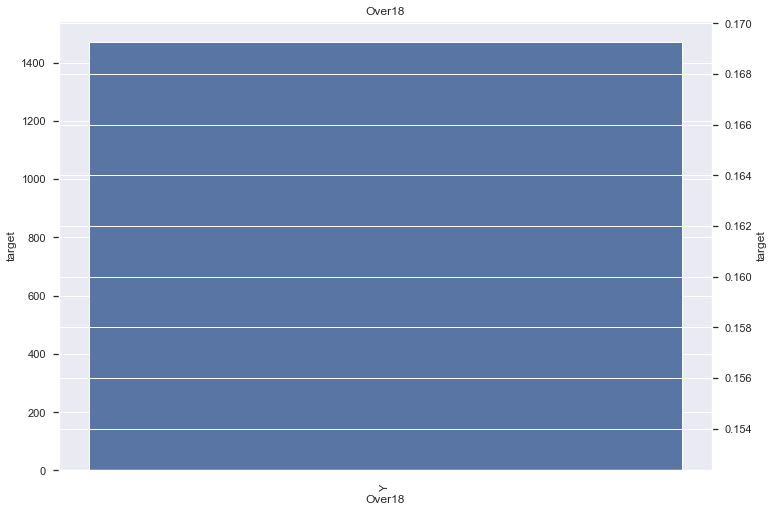

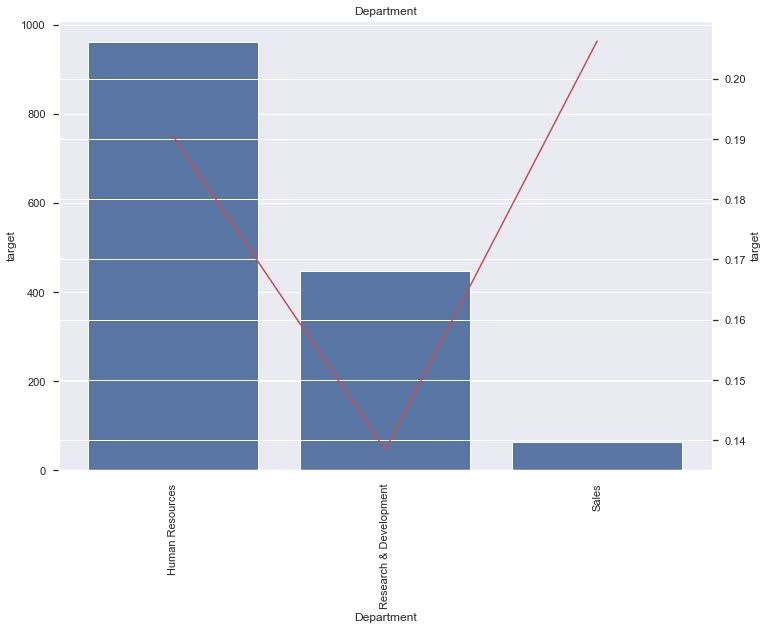

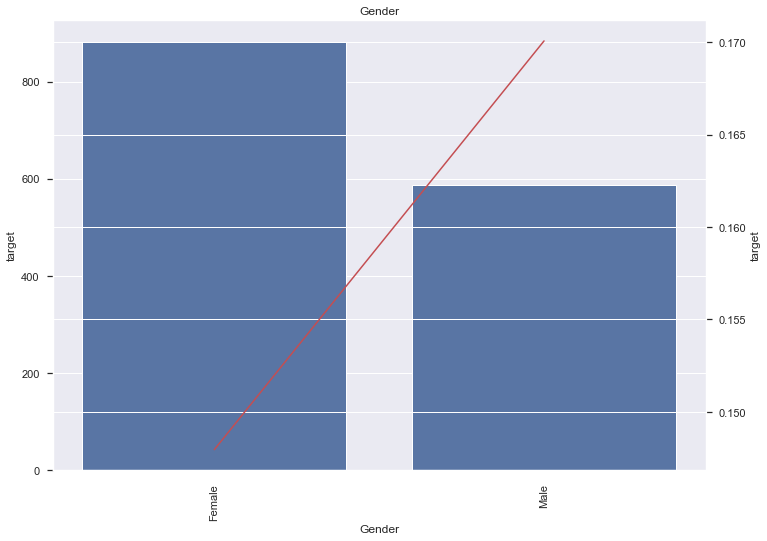

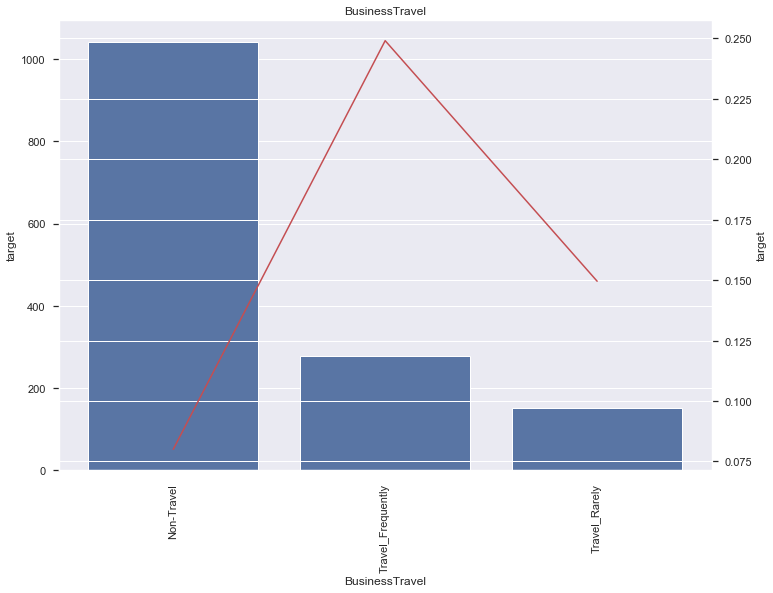

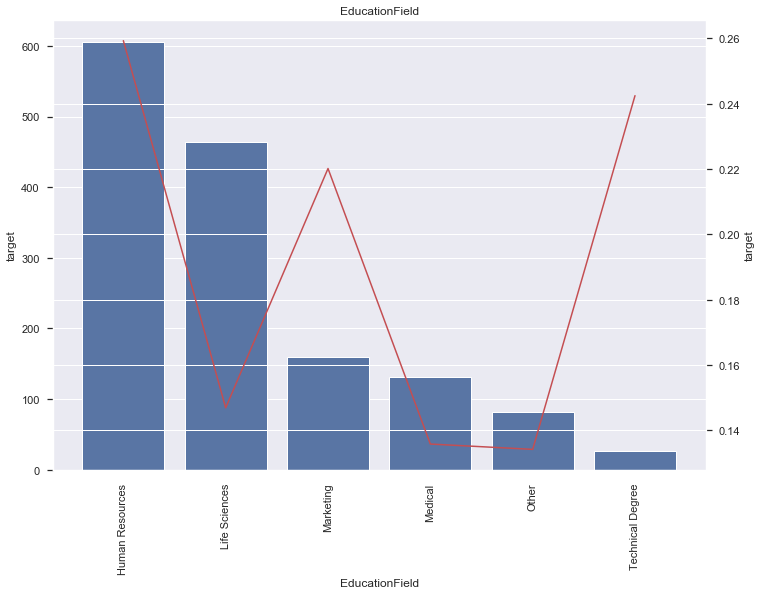

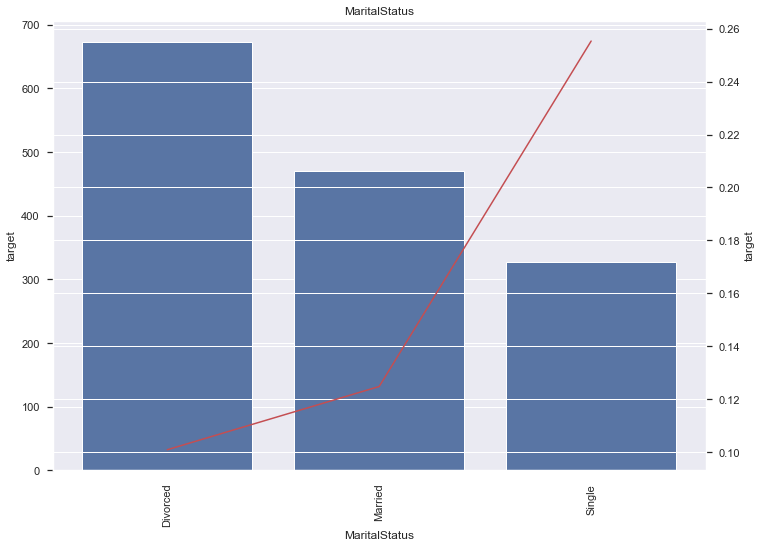

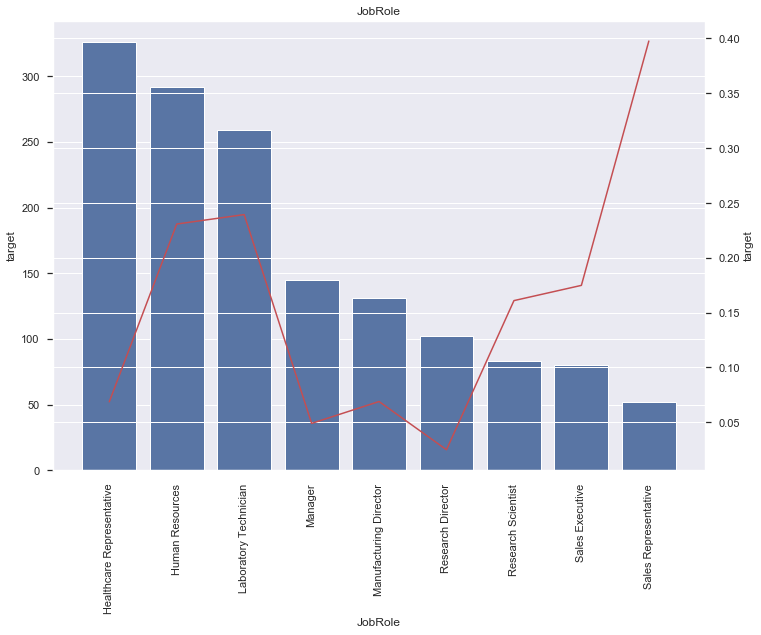

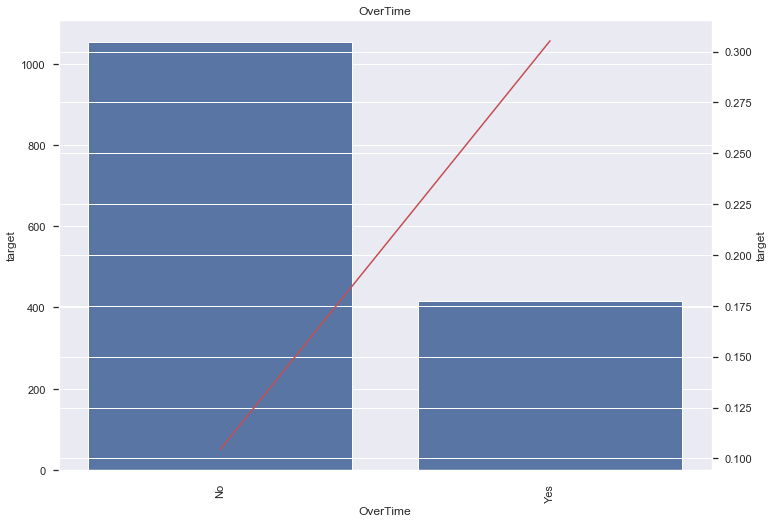

<Figure size 842.4x595.44 with 0 Axes>

In [15]:
# RUN FUNCTION TO EXAMINE CATEGORICAL DATA


In [22]:
#EXTRA SPACE TO SUPPLEMENT CATEGORICAL INFORMATION, IF NEEDED

# 6. Univariate Distribution Analysis

In [16]:
def univariate_plots(data, num_cols):
    data = data.dropna()
    
    for col in num_cols:
        x = data[col]
        plt.figure(col)
        try:
            ax = sns.kdeplot(x, shade=True, color="r").set_title(col)
            ax = sns.distplot(x)
        except Exception as e:
            print("didn't work for varaible: {}, {}".format(col, e))
            


didn't work for varaible: EmployeeCount, singular matrix


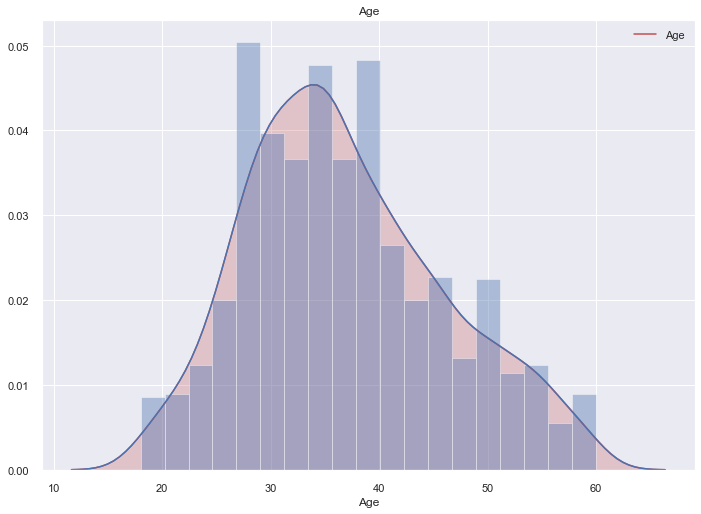

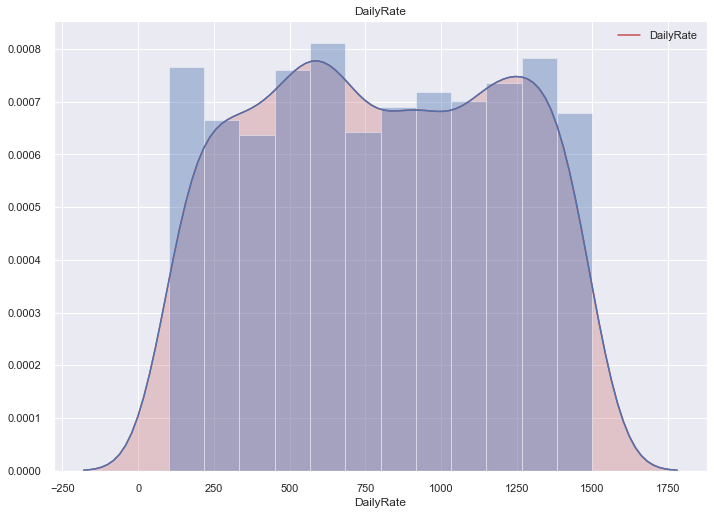

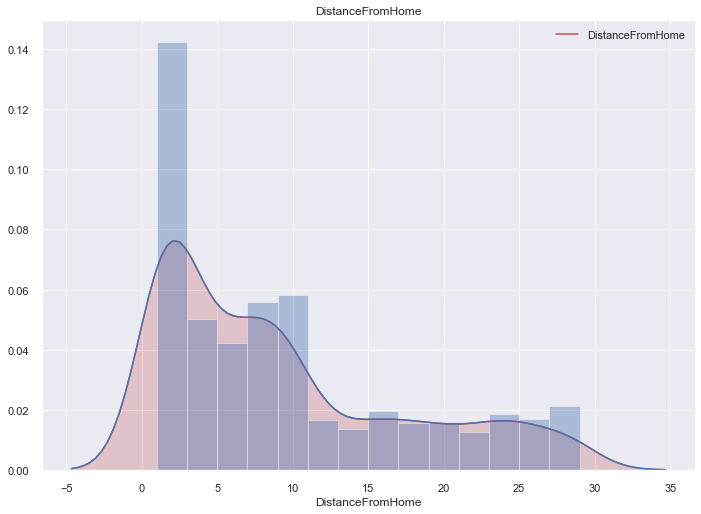

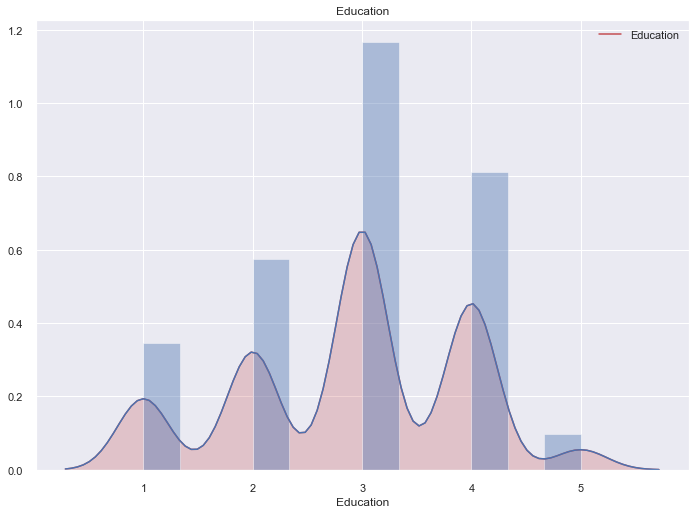

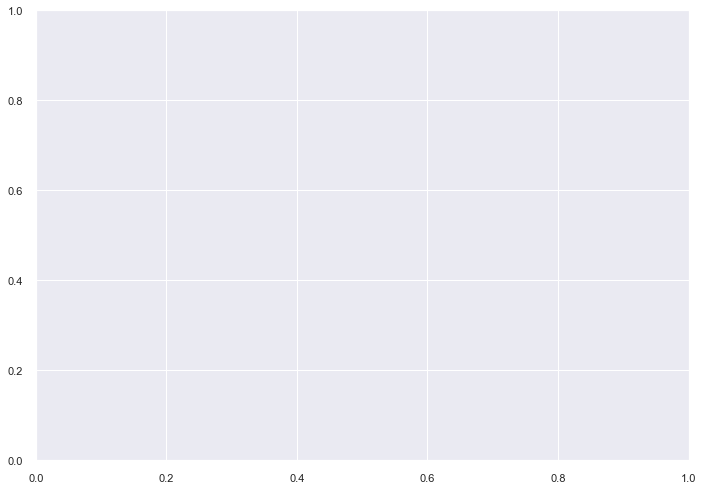

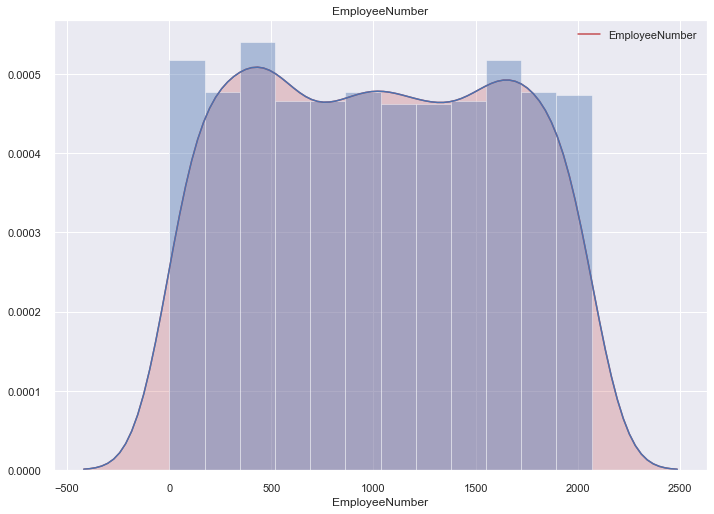

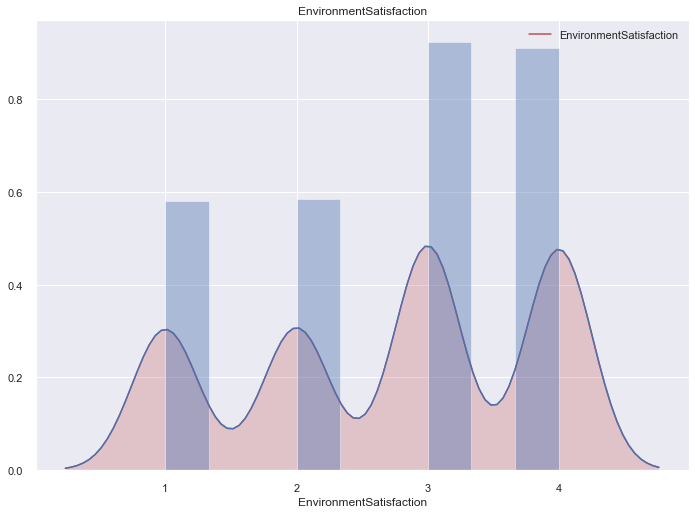

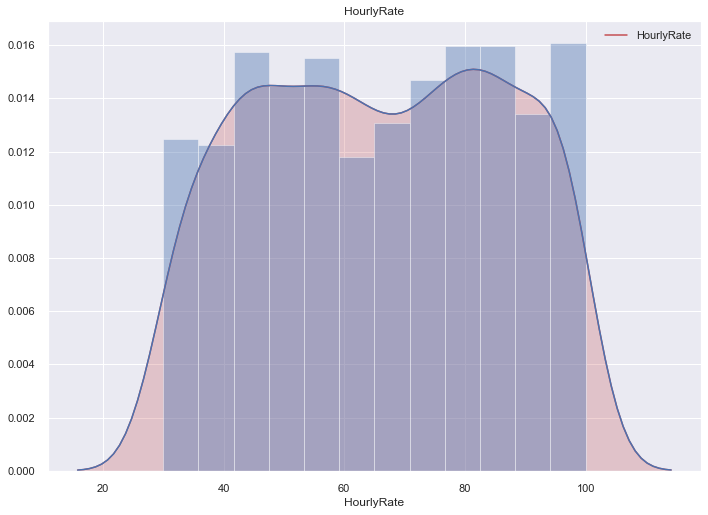

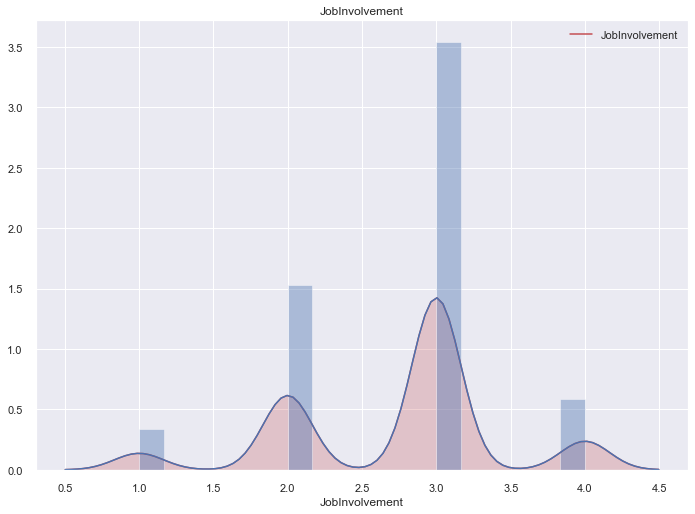

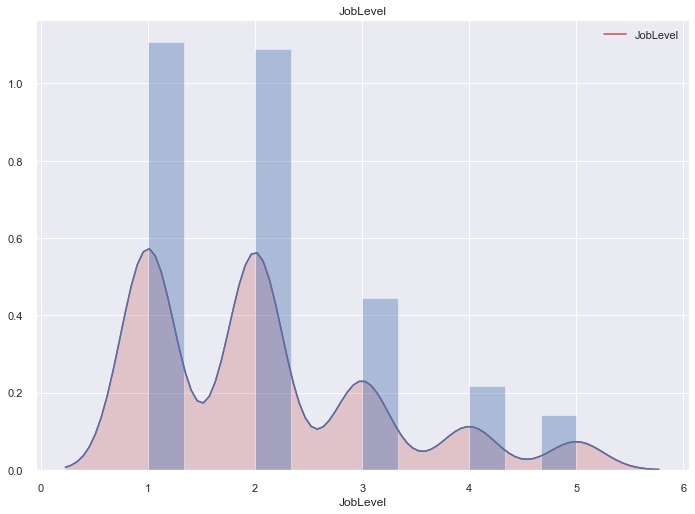

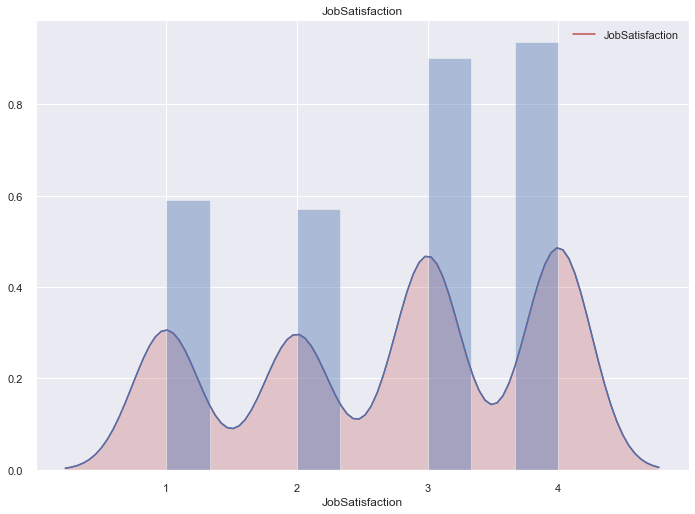

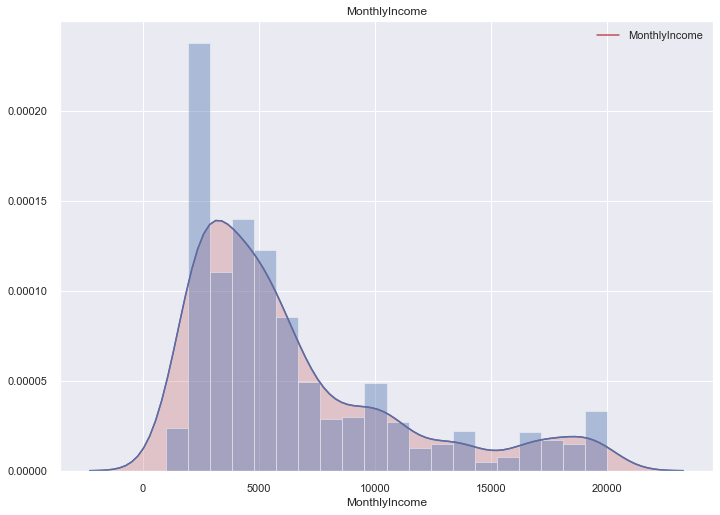

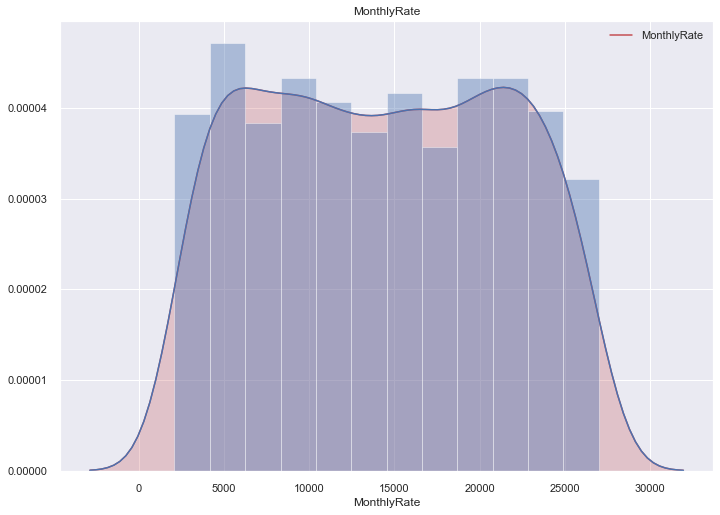

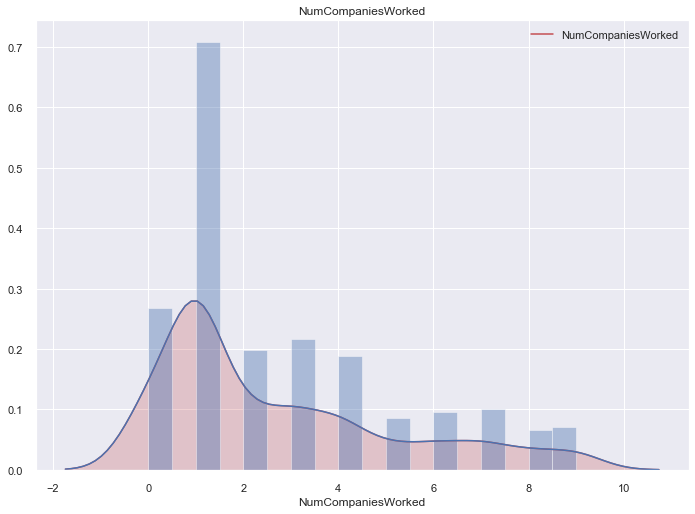

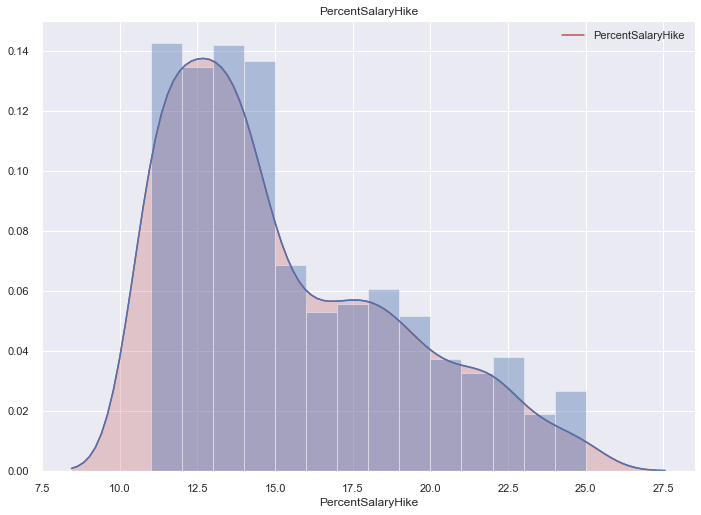

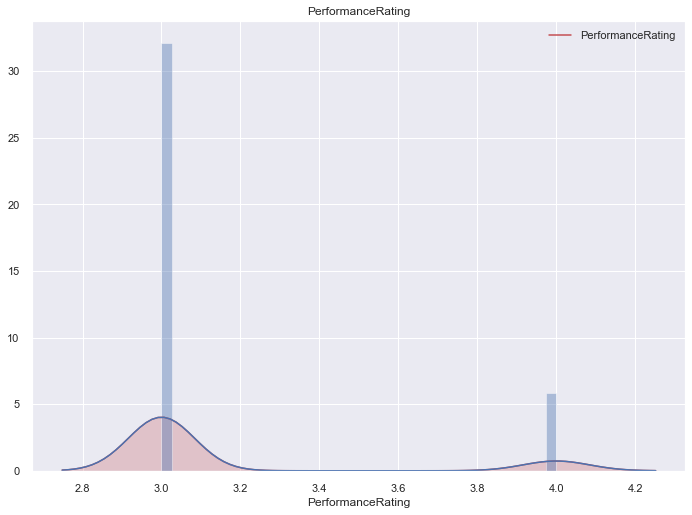

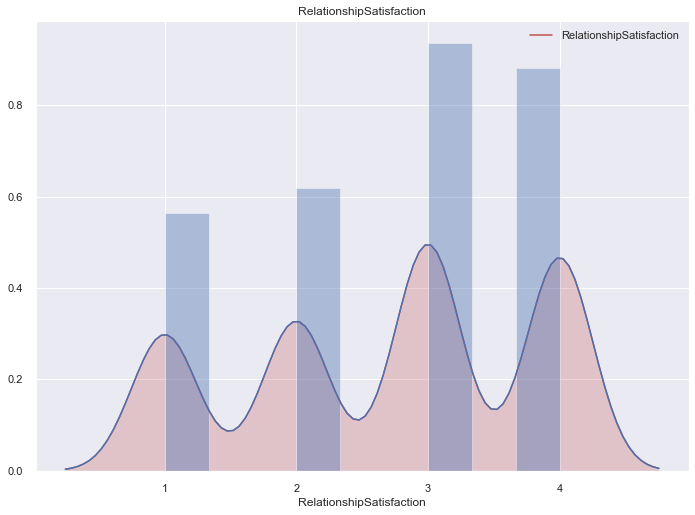

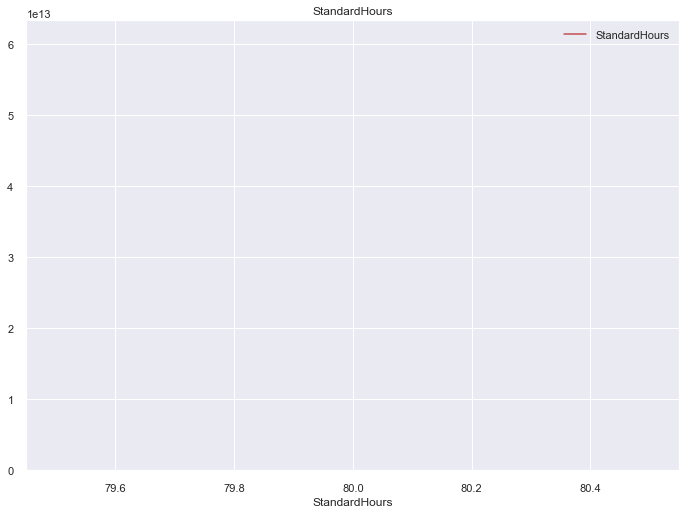

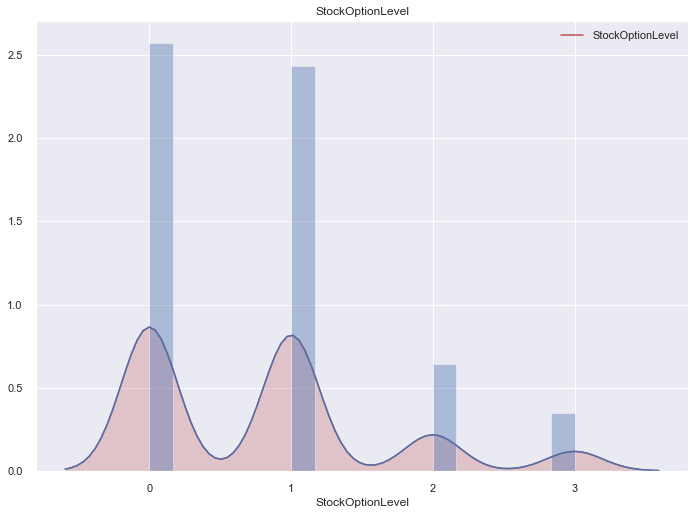

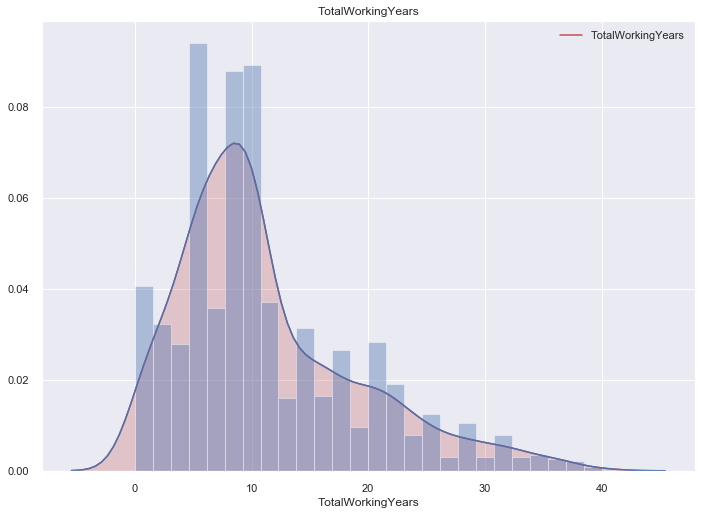

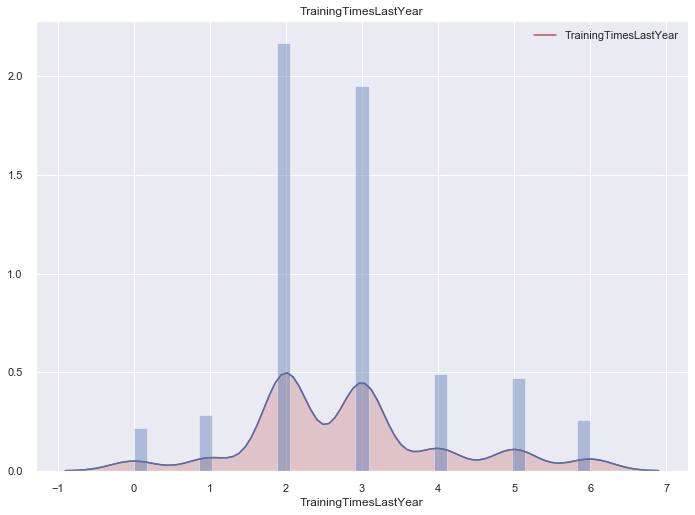

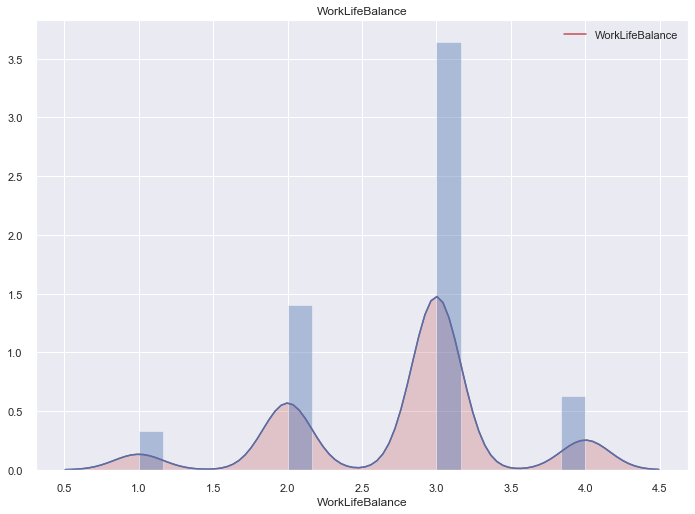

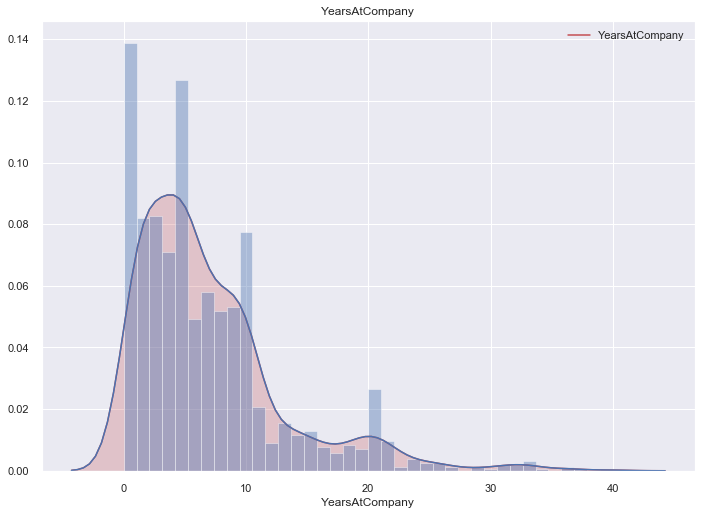

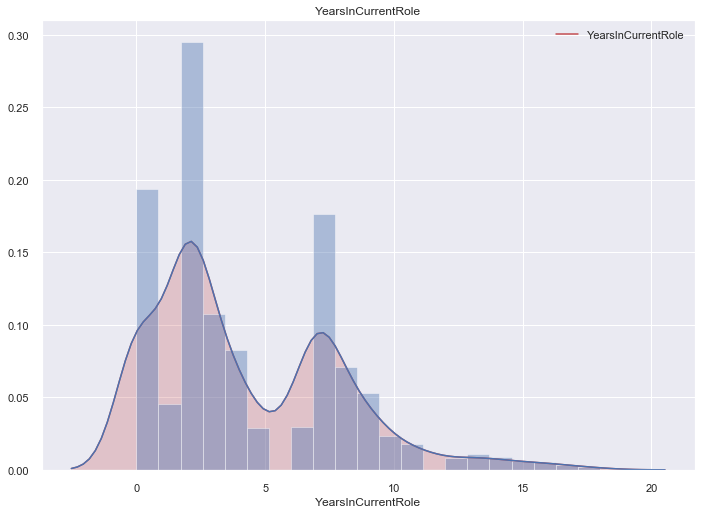

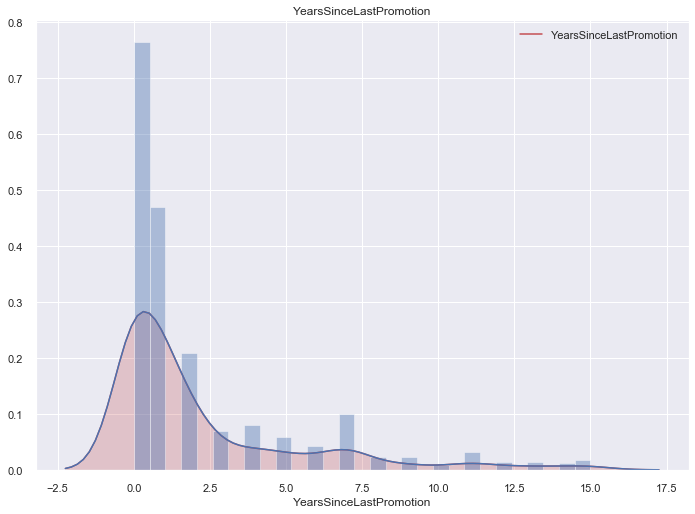

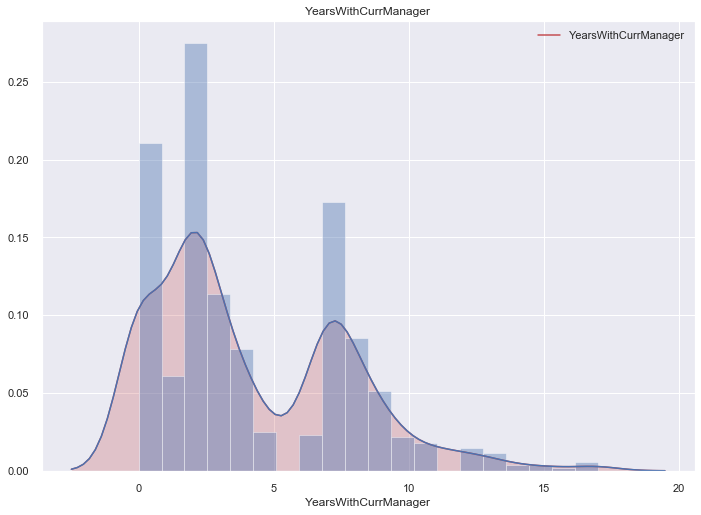

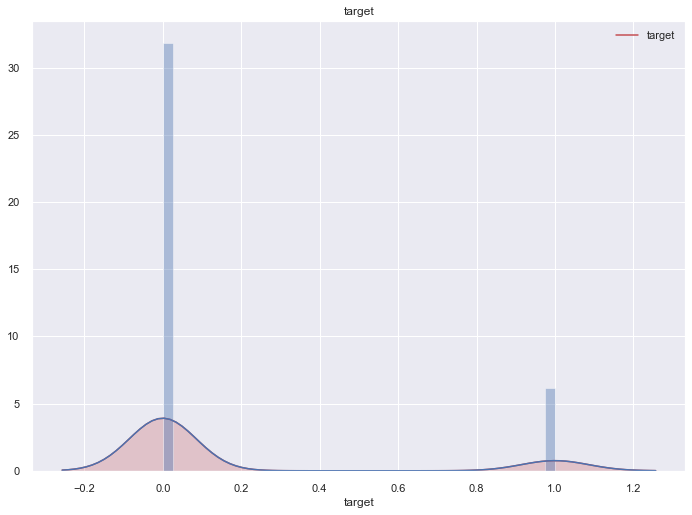

In [17]:
#GENERATE UNIVARIATE PLOTS FOR NUMERIC DATA 


In [18]:
# ADD EXTRA CODE FOR UNIVARIATE PLOTS, IF NEEEDED

# 7. Distribution Bivariate Plots

In [13]:
def bivariate_plots(data):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    #NOTE THIS WORKS if TARGET IS 0 OR 1
    data = data.dropna()
    
    d0 = data[data["target"] == 0]
    d1 = data[data["target"] == 1]

    for col in num_cols:
        x0 = d0[col]
        x1 = d1[col]
        plt.figure()

        try:
            new_labels = ['Retained', 'Attrited']
            ax = sns.kdeplot(x0, shade=True, color="b", legend=True).set_title(col)

            ax = sns.kdeplot(x1, shade=True, color="r", legend=True)
            plt.legend(title='Distribution', loc='upper right', labels=new_labels)

        except Exception as e:
            print("Error: ", col, "is a", e)
            pass

Error:  EmployeeCount is a singular matrix


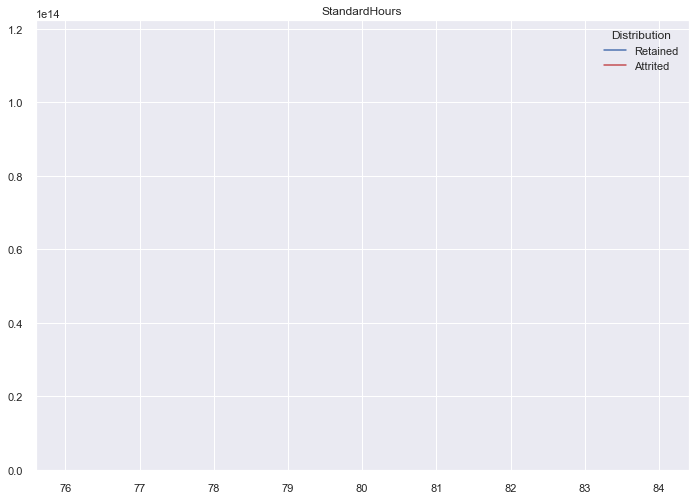

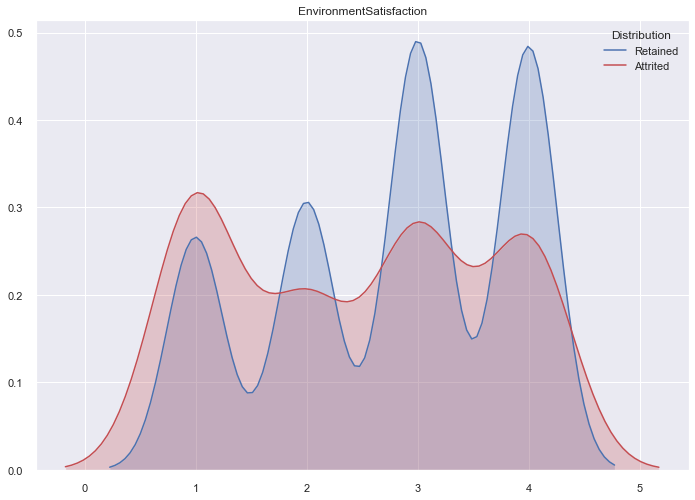

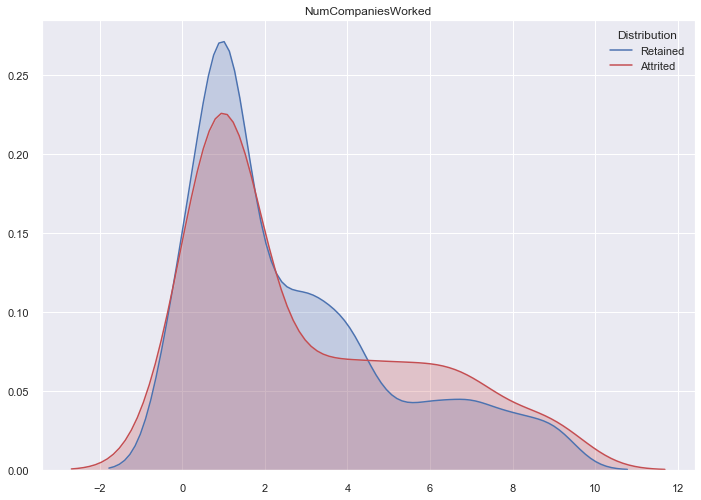

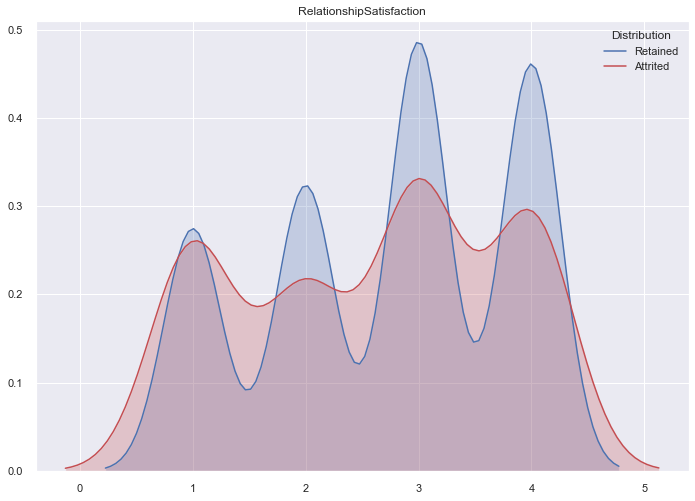

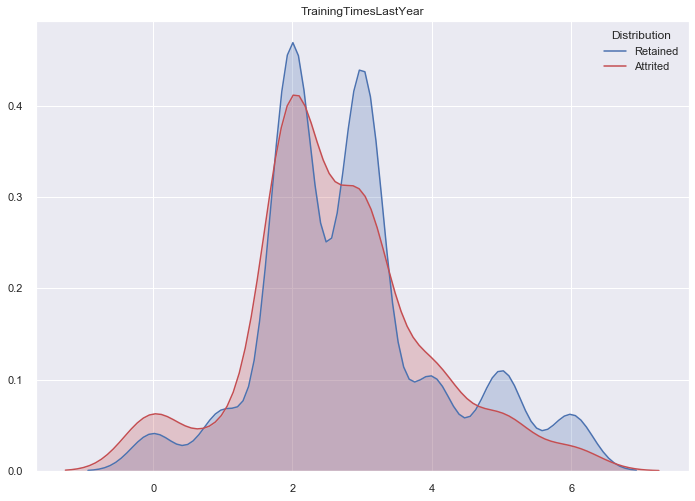

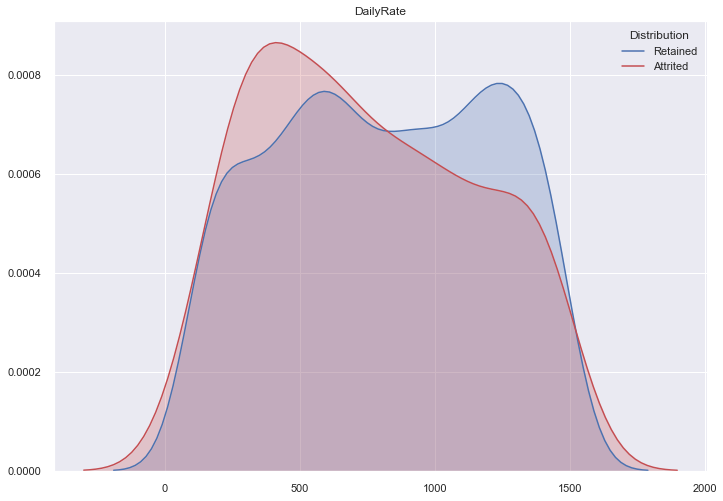

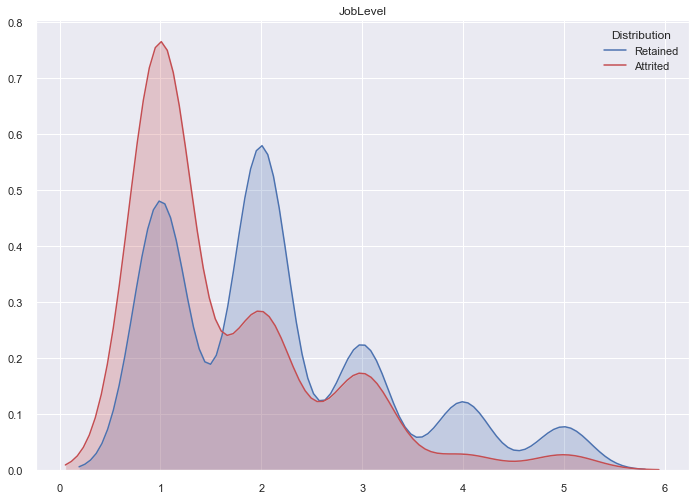

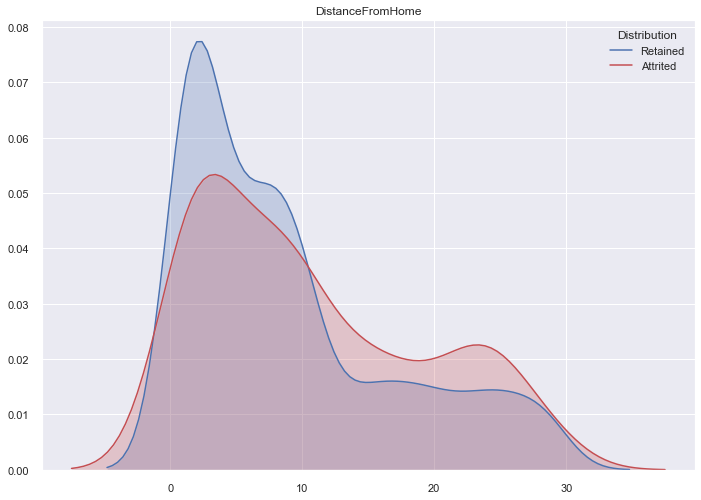

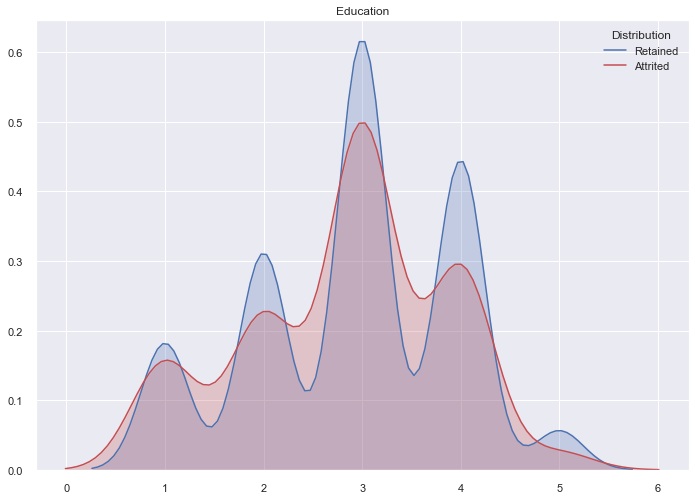

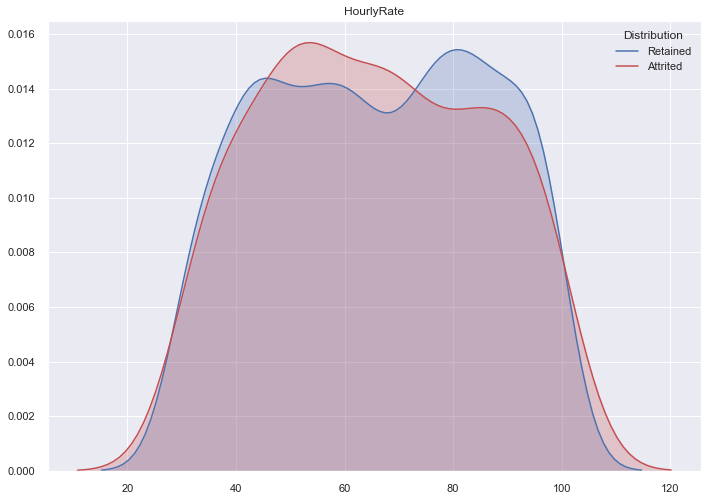

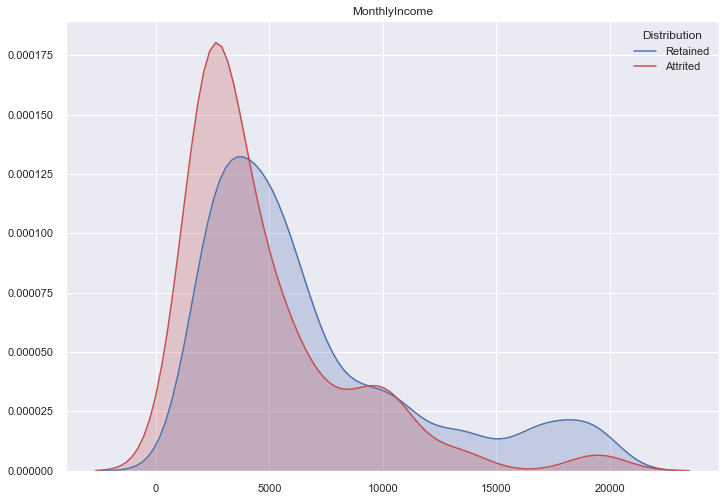

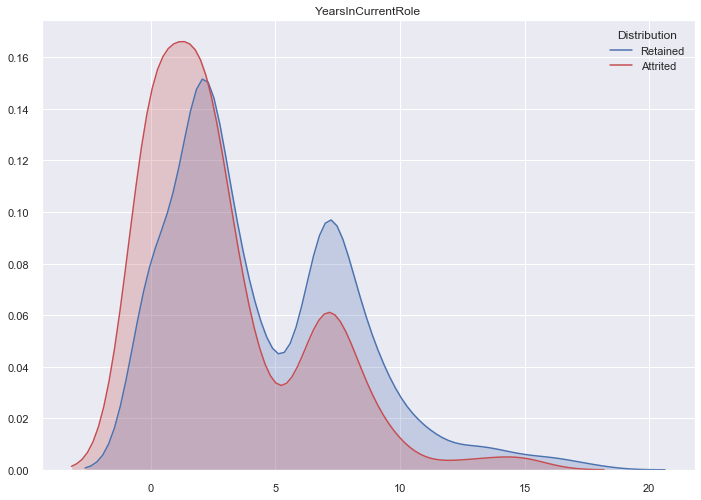

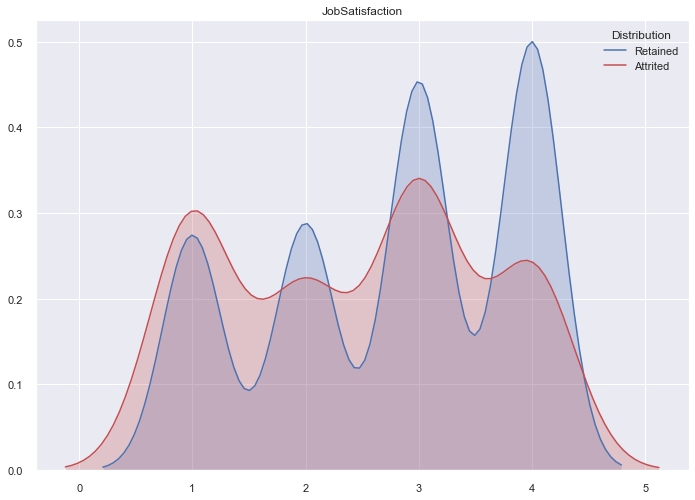

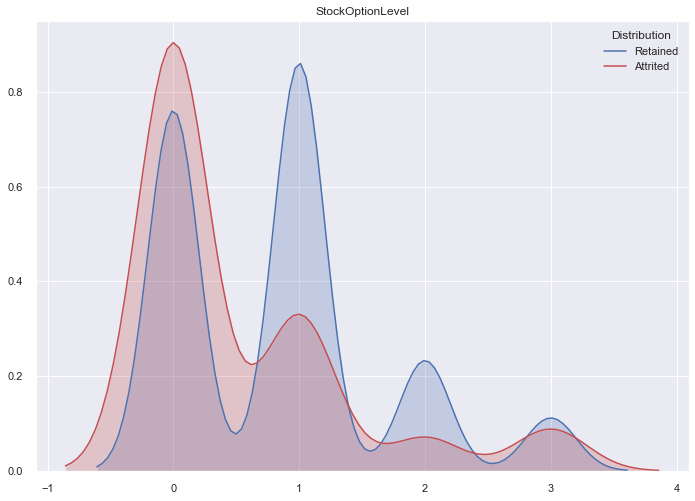

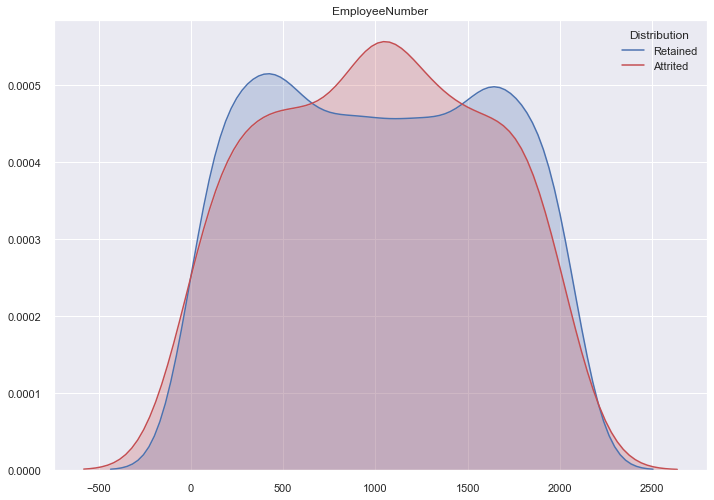

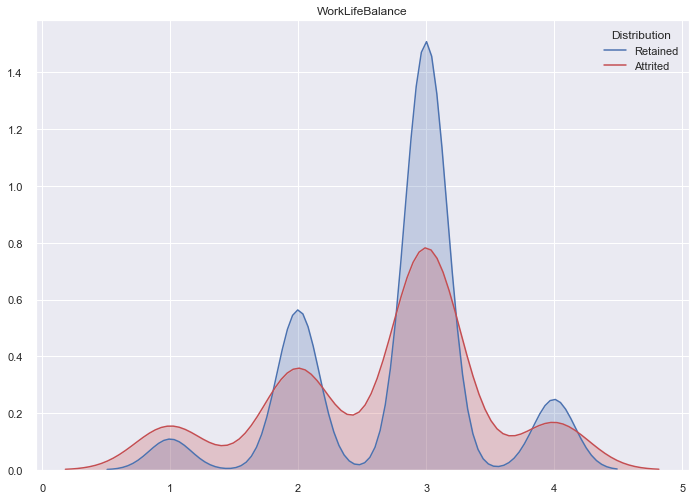

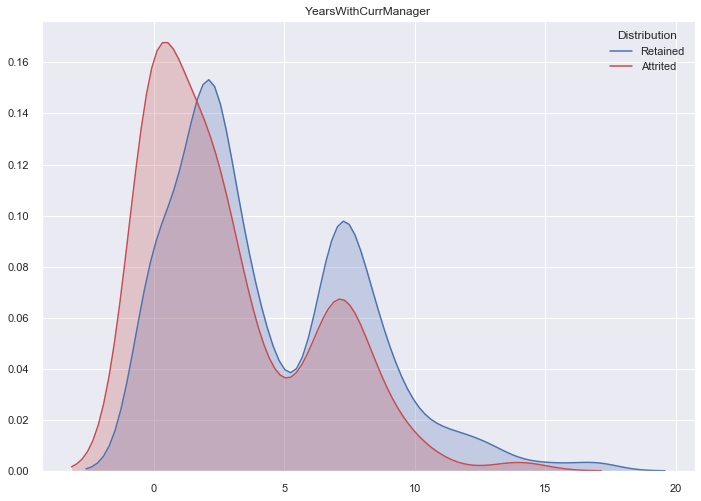

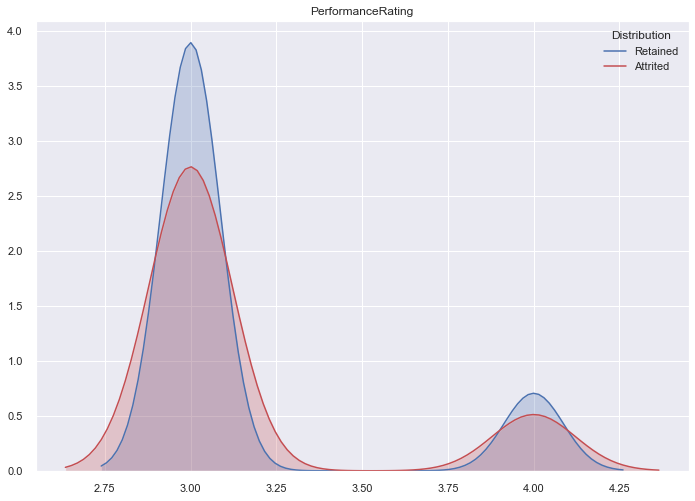

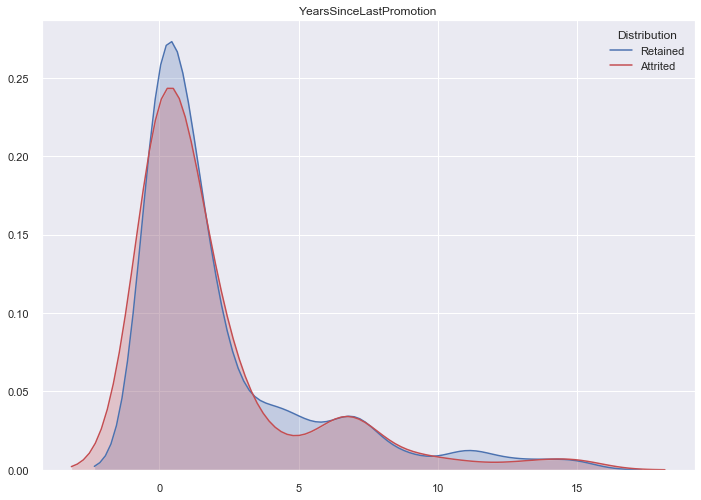

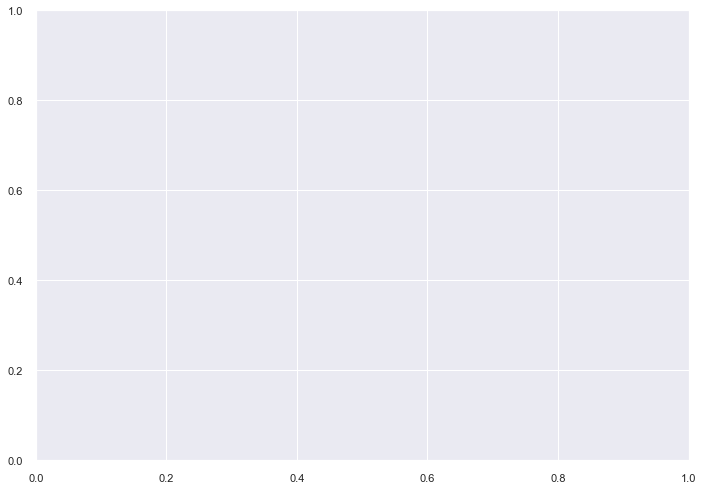

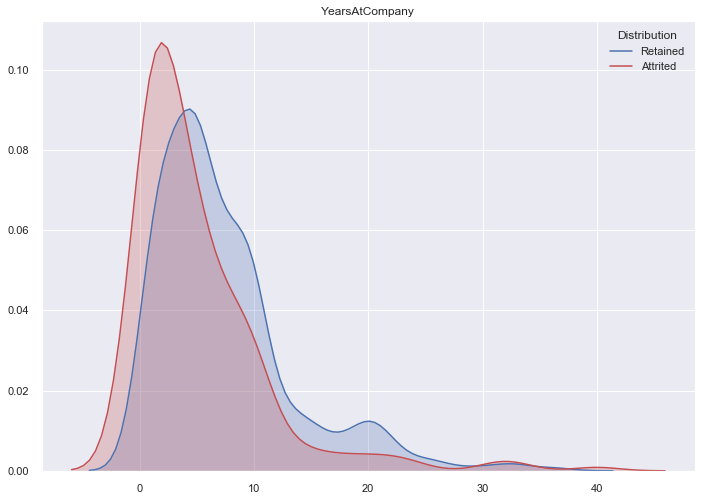

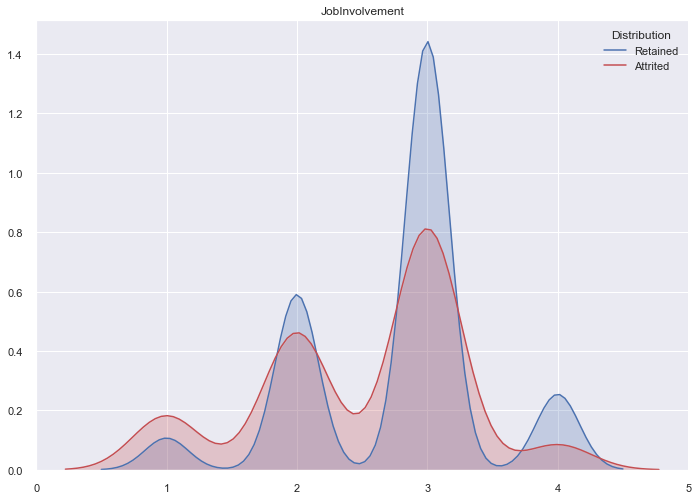

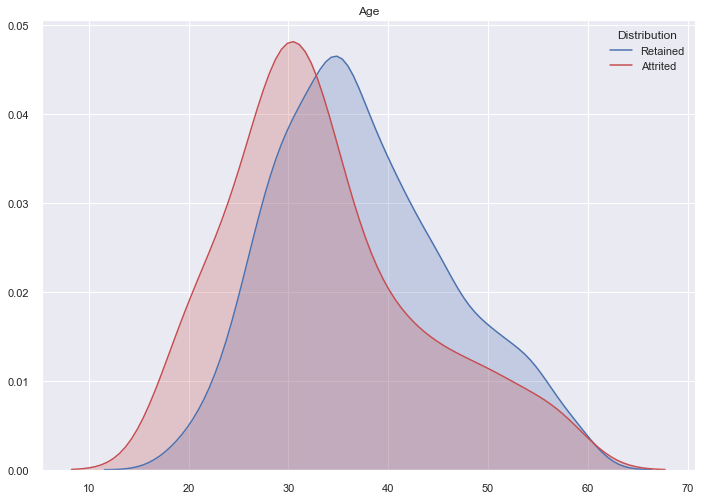

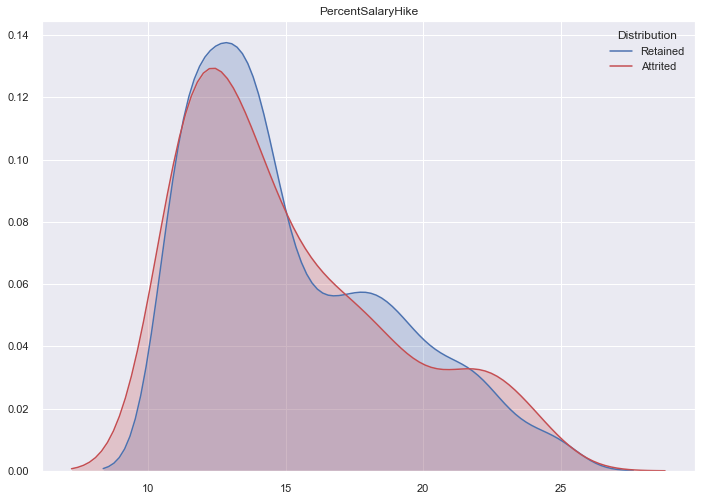

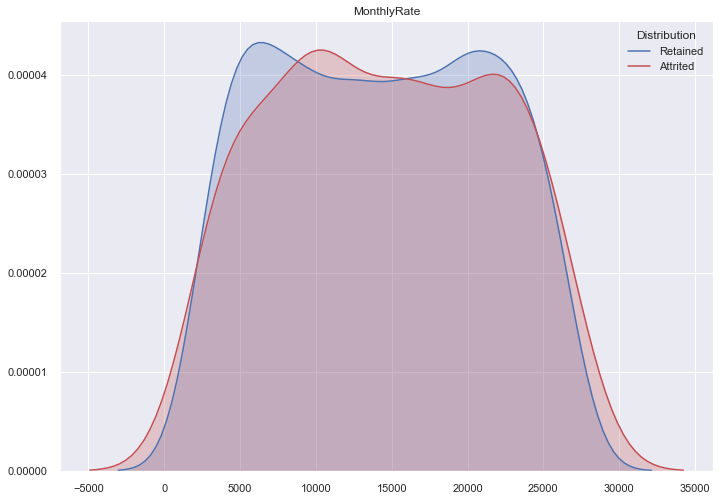

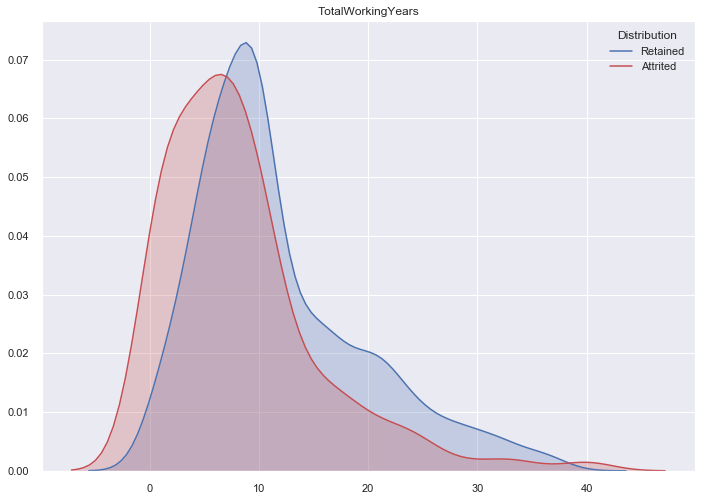

In [20]:
#GENERATE BIVARIATE PLOTS


In [21]:
# ADD EXTRA CODE FOR BIVARIATE PLOTS, IF NEEDED

# BONUS: Add any bonus content code below

# Next Steps

Now that you are finished with the guided lab, please do the following:
- **2 hours** - Summarize your findings in a powerpoint, and choose one person's Jupyter notebook to clean up, finalize, and save. You will present the powerpoint and provide the Jupyter notebook as supplemental material to the group. Feel free to reach out if you have any questions. 
- **45 minutes** - Present your findings to the group. Each team will get a total of 30 minutes to present.